<a href="https://colab.research.google.com/github/sakarla/Machine-Learning-for-Architecs/blob/main/week%205_Data%20Visualization/Code/Week5_Self_Organizing_Maps_(SOM).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In this notebook, you will learn how to apply the clustering algorithm to the image dataset. We collected satellite images and street view images before and now we want to run Self self-organizing map which is one of the unsupervised algorithms for clustering data.

This is a pipeline of our work:

1.  **Introduction to SOMs:** Provide a brief overview of what SOMs are and how they are used in machine learning.
2. **Environment Setup:** Instructions on installing necessary libraries.
3.  **Data Loading:** How to load data from a folder.
4.  **Data Preprocessing:** Preparing image data for training.
5.  **Training the SOM:** Setting up and training the SOM on image data.
6.  **Visualization:** Visualizing the results.
7.  **Conclusion:** Summarize what was learned.

## Introduction to Self-Organizing Maps (SOMs)

Self-Organizing Maps (SOMs) are a type of unsupervised learning that help to visualize and interpret high-dimensional data in lower-dimensional (usually 2D) spaces. They are particularly useful for clustering and visualizing complex datasets like images.


## Environment Setup

Please run the below cell to install necessary libraries if they are not already installed.


In [1]:
!pip install minisom Pillow


  Preparing metadata (setup.py) ... done
  Created wheel for minisom: filename=MiniSom-2.3.5-py3-none-any.whl size=12031 sha256=d2dff66e37063e9095f7209c73212f0d1a07ff0bb1e853d4453cf438b7c9183a
  Stored in directory: /root/.cache/pip/wheels/19/db/95/5e53bc2b88a328217fdf9f2886cafbe86b0df274f4b601f572
Successfully built minisom


## Loading Data

To start, we will link this notebook to your Google Drive. Make sure you are logged in on your Google account

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Data Preprocessing

You'll need to load your images and possibly preprocess them. This typically includes resizing the images to a standard size and flattening them into a vector form since SOMs work with vector data.
change the path if you needed for your dataset:`image_paths = glob.glob('/content/drive/MyDrive/Colab Notebooks/satellite_images/*.jpg') `

In [14]:
from PIL import Image
import numpy as np
import os
import glob
!pip install minisom
from minisom import MiniSom
import matplotlib.pyplot as plt


In [15]:

# Function to load and preprocess an image
def load_and_preprocess_image(path, size=(64, 64)):
    with Image.open(path) as img:
        img = img.convert('RGB')  # Ensure the image is in RGB
        img = img.resize(size)    # Resize image
    return np.array(img).flatten()  # Flatten the image

In [16]:
###########################################################################################
# Assuming your images are in a folder called 'downloaded_images'
image_paths = glob.glob('/content/drive/MyDrive/Colab Notebooks/ML_for_Architects/satellite_images/*.jpg')
###########################################################################################
data_satelite = np.array([load_and_preprocess_image(path) for path in image_paths])


## Train the Self-Organizing Map

We will now initialize and train our SOM on the preprocessed image features.


In [17]:
# SOM initialization and training
som_width = 3
som_height = 3
# Train the SOM
num_iteration = 100

som = MiniSom(som_width, som_height, data_satelite.shape[1], sigma=1.0, learning_rate=0.5)
# Randomly initialize weights
som.random_weights_init(data_satelite)
som.train_random(data_satelite, num_iteration)  # Training with random data each time
# determine best matching units for each image
bmu_indices = np.array([som.winner(x) for x in data_satelite])

## Visualization of SOM Results

After training the SOM, you might want to visualize the results to understand what the SOM has learned.


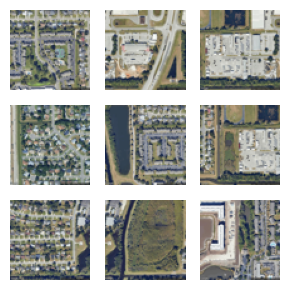

In [18]:


def plot_som_images(som, image_paths, bmu_indices, img_size=(64, 64)):
    """Plot the images assigned to each BMU in the SOM grid.

    Args:
    - som: Trained MiniSom object.
    - image_paths: List of paths to images.
    - bmu_indices: List of Best Matching Unit (BMU) indices for each image.
    - img_size: Size of each image (height, width).
    """
    som_width, som_height = som.get_weights().shape[:2]  # Get SOM dimensions

    fig, axes = plt.subplots(som_width, som_height, figsize=(som_width, som_height))

    for i in range(som_width):
        for j in range(som_height):
            # Find images that map to the BMU at (i, j)
            image_indices = [index for index, bmu in enumerate(bmu_indices) if np.array_equal(bmu, (i, j))]

            if len(image_indices) > 0:
                # Load the first image for this BMU
                img_index = image_indices[0]
                img = Image.open(image_paths[img_index]).resize(img_size)
                axes[i, j].imshow(img)
            else:
                # If no images map to this neuron, display an empty cell
                axes[i, j].axis('off')

            axes[i, j].axis('off')  # Hide axis

    plt.tight_layout()
    plt.show()

# Assuming bmu_indices is the list of BMUs corresponding to each image
plot_som_images(som, image_paths=image_paths, bmu_indices=bmu_indices, img_size=(64, 64))


# **Streetview images**

Now we want to train SOM on the Street View dataset and visualize it.

In [20]:
###########################################################################################
# Assuming your images are in a folder called 'downloaded_images'
image_paths = glob.glob('/content/drive/MyDrive/Colab Notebooks/ML_for_Architects/streetview_images/*.jpg')

###########################################################################################
data_streetview = np.array([load_and_preprocess_image(path) for path in image_paths])

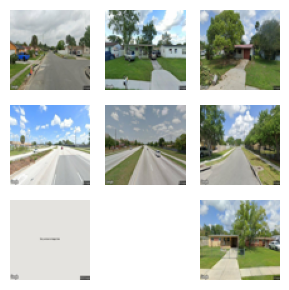

In [21]:


# SOM initialization and training
som_width = 3
som_height = 3
num_iteration = 100

som = MiniSom(som_width, som_height, data_streetview.shape[1], sigma=1.0, learning_rate=0.5)
# Randomly initialize weights
som.random_weights_init(data_streetview)
# Train the SOM
som.train_random(data_streetview, num_iteration)  # Training with random data each time
bmu_indices = np.array([som.winner(x) for x in data_streetview])

# Assuming bmu_indices is the list of BMUs corresponding to each image
plot_som_images(som, image_paths=image_paths, bmu_indices=bmu_indices, img_size=(64, 64))
